### Preprocessat
Aquí hem d'incloure tot el preprocessat de l'exercici 2 per fer l'exercici 3:

### Importar dades:
En primer lloc importem les dades de l'arxiu movie.dat. Agafarem les dades directament del Github, clicant al botó 'Raw'. Utilitzarem el metode read_csv i observem que hem d'utlitzar '::' com a delimitador. Hem hagut de buscar el tipus de codificació per poder veure les dades com cal. Fem un cop d'ull a la dimensió i a veure si hi han dades buides

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies_data = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat', sep='::', encoding='ISO-8859-1', engine='python', names = ['id', 'name_(year)', 'genre'], index_col='id')
movies_data

,name_(year),genre
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [2]:
movies_data.shape

(3883, 2)

In [3]:
movies_data.isna().sum()

name_(year)    0
genre          0
dtype: int64

### Tractament de dades:
Per crear les noves columnes amb les dades demanades utlitzarem slices i re.  
L'estrategia serà agafar les dades utilitzant patrons i guardar-les en una nova llista que després afegirem al dataframe:
- Ho farem per una nova columna (Genre) a on afegirem el primer genere que apareix a la columna genre.
- També ho farem per a una nova columna (Year) amb l'any (com a integer!). L'agafarem de la columna name_(year).
- I finalment ho farem per a una nova columna (Film) a on agafarem el text de la pelicula de la columna name_(year).

In [4]:
import re

pattern_genre = '^\w+'  # Amb aquest patró agafem la primera paraula de la cel·la fins que es troba el primer '|'
genre_list = []
for line in movies_data['genre']:
    if re.search(pattern_genre, line):
        genre_list.append(re.search(pattern_genre, line).group())

pattern_year = '\d{4}.$'  # Amb aquest patró agafem quatre xifres situades a un caracter del final de l'string
year_list = []
for line in movies_data['name_(year)']:
    if re.search(pattern_year, line):
        year_list.append(int(re.search(pattern_year, line).group()[slice(0, -1)]))  # El slice és per treure el parentesi del final

# Sense re, amb slices
film_list = []
for line in movies_data['name_(year)']:
        film_list.append((line)[slice(0, -7)])  # Els set últims caracters corresponen a l'any, els seus parentesis i l'espai abans.

El codi per crear noves columnes a un dataframe a partir de llistes és el següent:

In [5]:
movies_data['Film'] = film_list
movies_data['Year'] = year_list
movies_data['Genre'] = genre_list

Ja tenim les columnes que necessitâvem. A partir d'aqui ens podem desfer de les dues columnes originals, que ja no necessitem.

In [6]:
movies_data.drop(['name_(year)', 'genre'], axis=1, inplace=True)

In [7]:
movies_data

,Film,Year,Genre
id,,,
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
...,...,...,...
3948,Meet the Parents,2000,Comedy
3949,Requiem for a Dream,2000,Drama
3950,Tigerland,2000,Drama


In [8]:
movies_data.describe(include='all')

,Film,Year,Genre
count,3883,3883.000000,3883
unique,3841,NaN,18
top,Hamlet,NaN,Drama
freq,5,NaN,1176
mean,NaN,1986.066959,NaN
std,NaN,16.895690,NaN
min,NaN,1919.000000,NaN
25%,NaN,1982.000000,NaN
50%,NaN,1994.000000,NaN
75%,NaN,1997.000000,NaN


In [9]:
movies_data.dtypes

Film     object
Year      int64
Genre    object
dtype: object

## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

## Gràfiques:
En primer lloc, el que és relevant d'aquest dataset és que tenim dues variables categotiques (film i genere) i una numerica (any). Podrem graficar les quantitats de films per any, per genere, al llatg del temps, i com a proporcio. Per això utilitzarem, grafics de barres, histogrames, pie charts i haurem d'utilitzar groupby's amb count's.

A continuació podem observar el total de films a cada any desde 1919 fins a 2000, que és el rang inclós a la base de dades. La quantitat de films va en augment al llarg del temps. A l'any 2000 hi ha una devallada. Això podria ser perque no tenim totes les dades disponibles d'aquell any o també per algun factor típic d'aqull any, com una crisi financera.

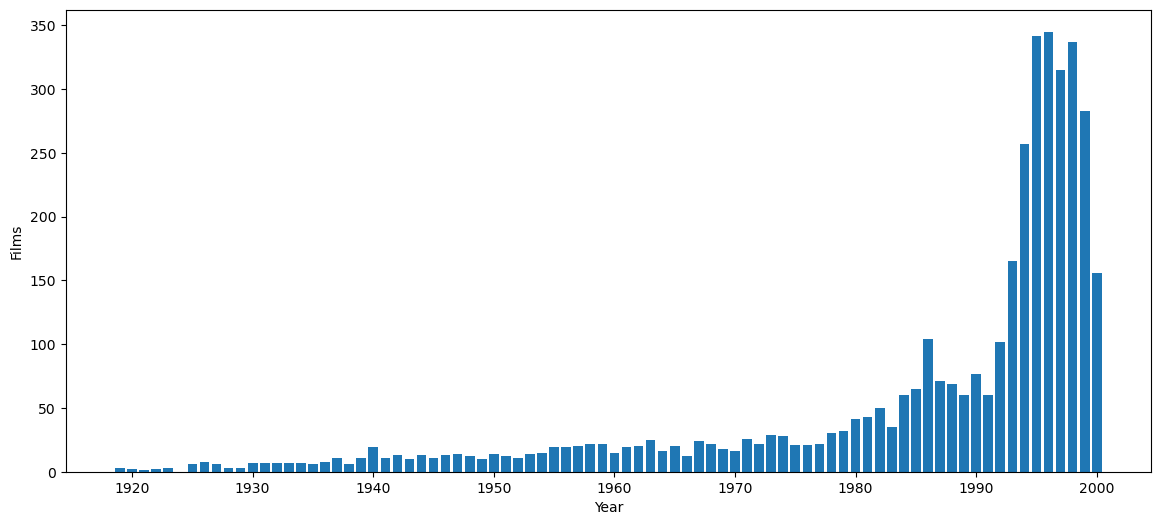

In [10]:
# Amb matplotlib
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(movies_data.groupby('Year')["Film"].count().index, movies_data.groupby('Year')["Film"].count())
ax.set_xlabel('Year')
ax.set_ylabel('Films')
plt.show()

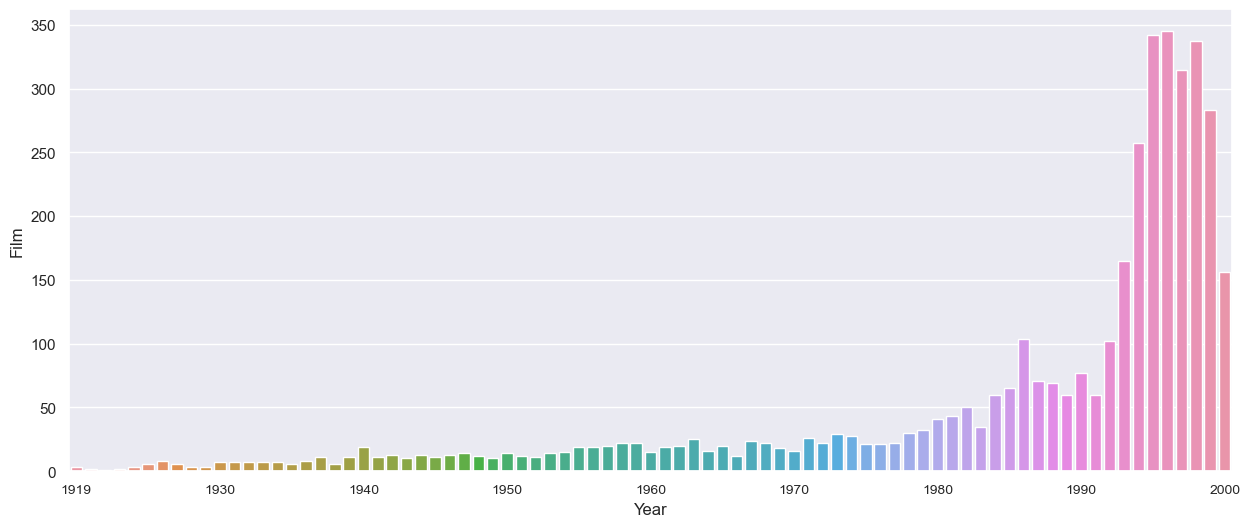

In [11]:
# amb seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(data = movies_data, 
            y = movies_data.groupby('Year')["Film"].count(), 
            x = movies_data.groupby('Year')["Film"].count().index)
plt.xticks(np.arange(0, len(movies_data.groupby('Year')["Film"].count().index)+1, 10),  # aixo es per posar un interval al eix x
           rotation=0, fontsize='small')
plt.show()

El següent codis grafiquen el total de films per genere a tota la base de dades. És curiós que guanyin de carrer dos tipus de film tan antagónics com el drama i la comedia. Es pot fer com a gràfic de barres o com a pie chart, que ens dona també els percentatges de cada genere.

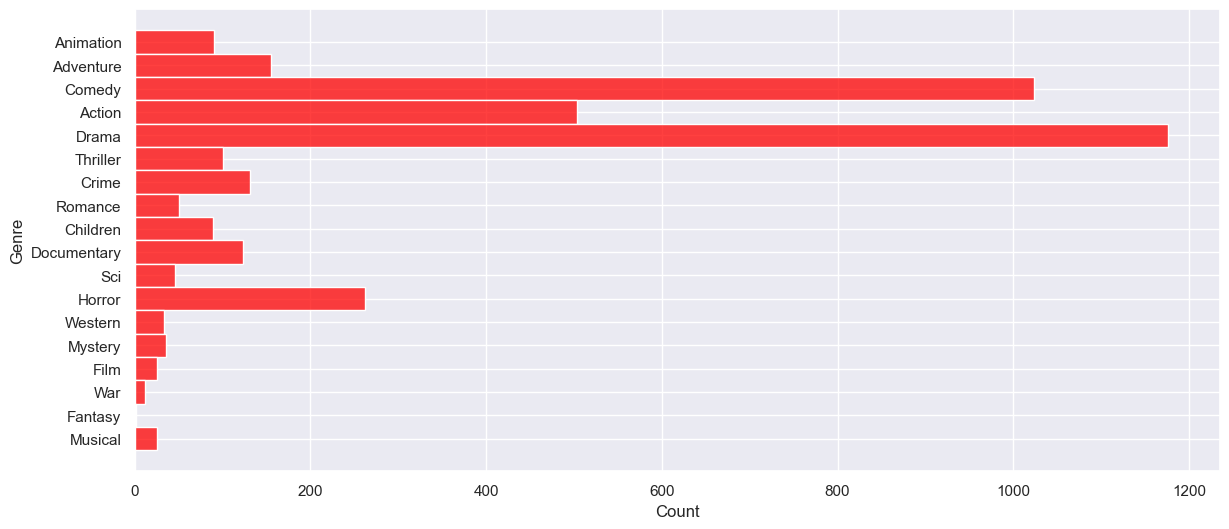

In [12]:
plt.figure(figsize=(14,6))
sns.histplot(data = movies_data, y = 'Genre', color = 'Red')
plt.show()

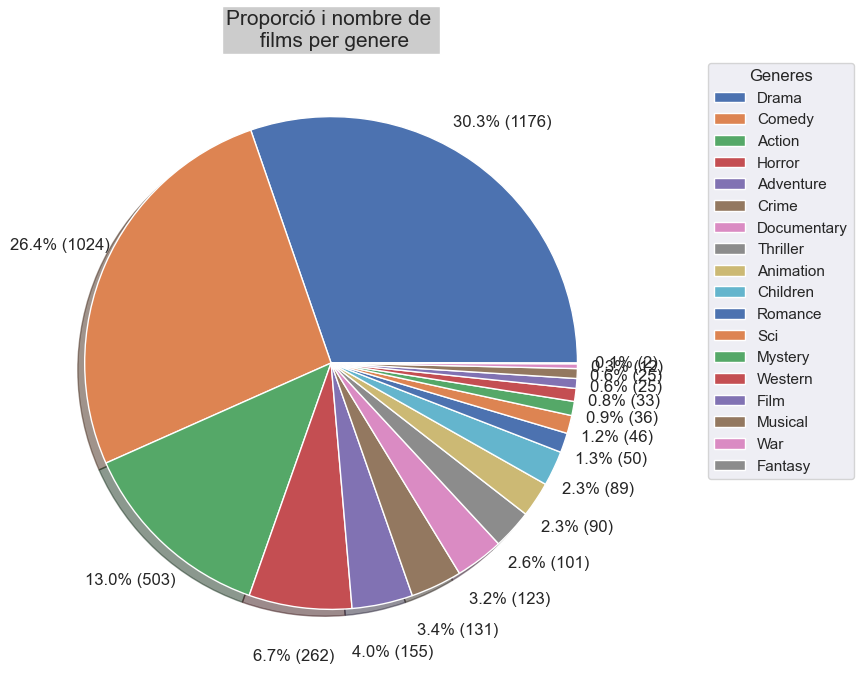

In [13]:
plt.figure(figsize=(8,8))
plt.pie((movies_data['Genre'].value_counts()), 
        startangle = 0, counterclock=True, shadow = True, 
        autopct = lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*(movies_data['Genre'].value_counts()).sum()), 
        pctdistance = 1.2, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.legend(title = "Generes", bbox_to_anchor=(1.1, 1), loc='upper left', labels = movies_data['Genre'].value_counts().index)
plt.title('Proporció i nombre de \n films per genere', fontsize=15, bbox={'facecolor':'0.8', 'pad':2.5})
plt.show()

A continuació intentem graficar l'evolució dels films anuals desglosats per genere (amb un stack). Ho intentem amb un histplot, que nomes ens ofereix resultats anuals si augmentem molt el nombre de bins (per sobre del total d'anys).

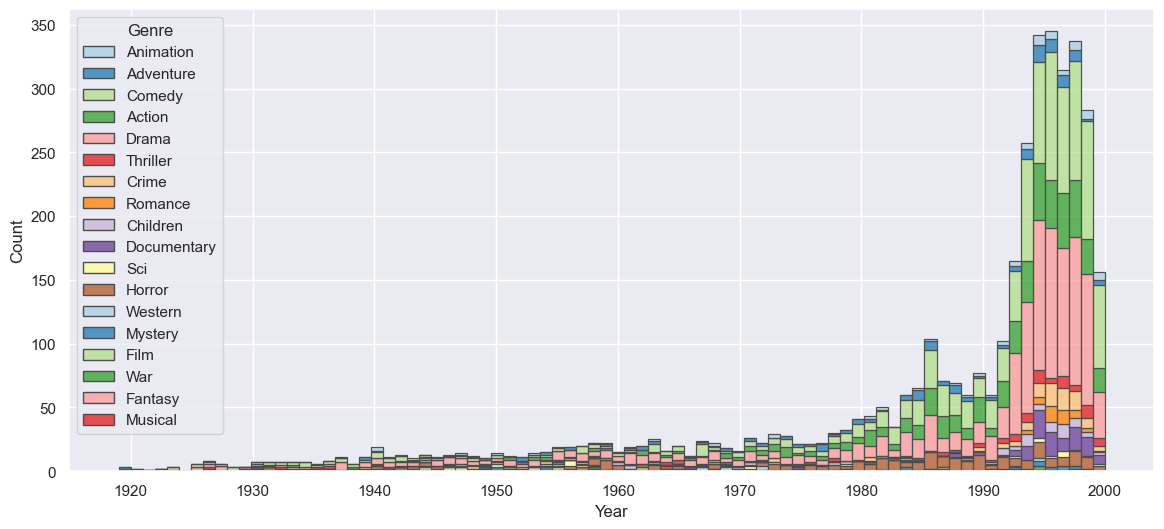

In [14]:
plt.figure(figsize=(14,6))
sns.histplot(data = movies_data, x = 'Year', hue = 'Genre', bins = len(movies_data.groupby('Year')["Film"].count().index)+1, 
             multiple="stack", edgecolor=".3", palette='Paired')
plt.show()

Com a consulta de dades, pot ser una mica difícil treure'n l'entrellat de la grafica anterior, així doncs hem creat una funció per poder mirar les pelicules per genere a cada any que desitgem:

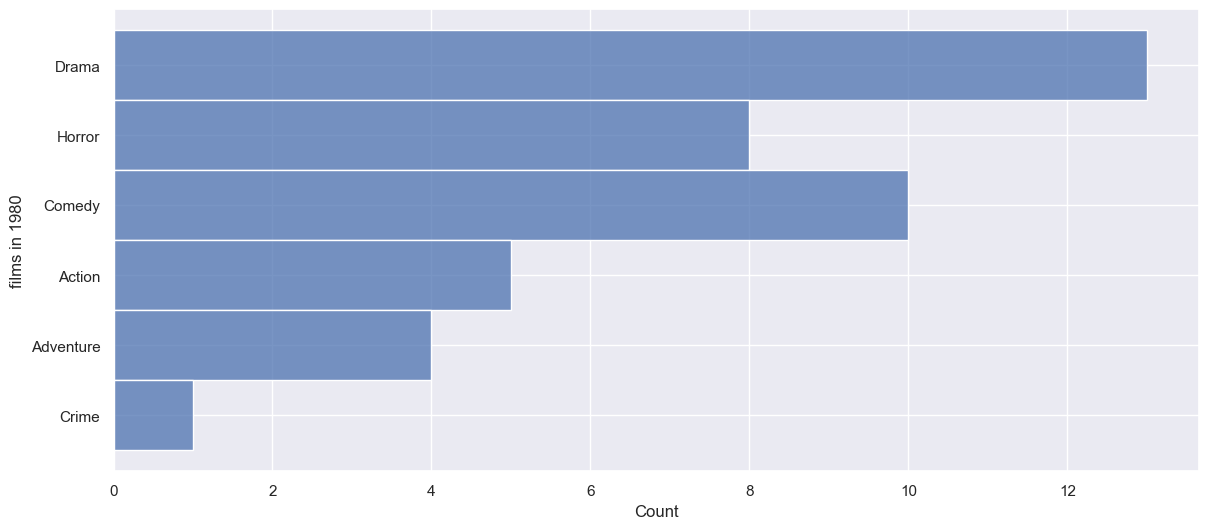

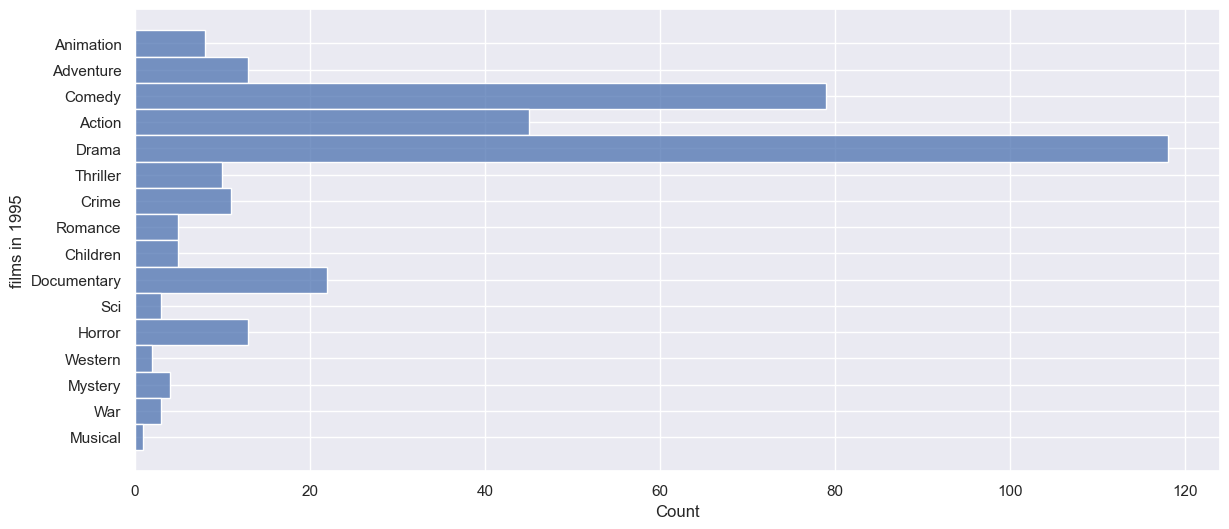

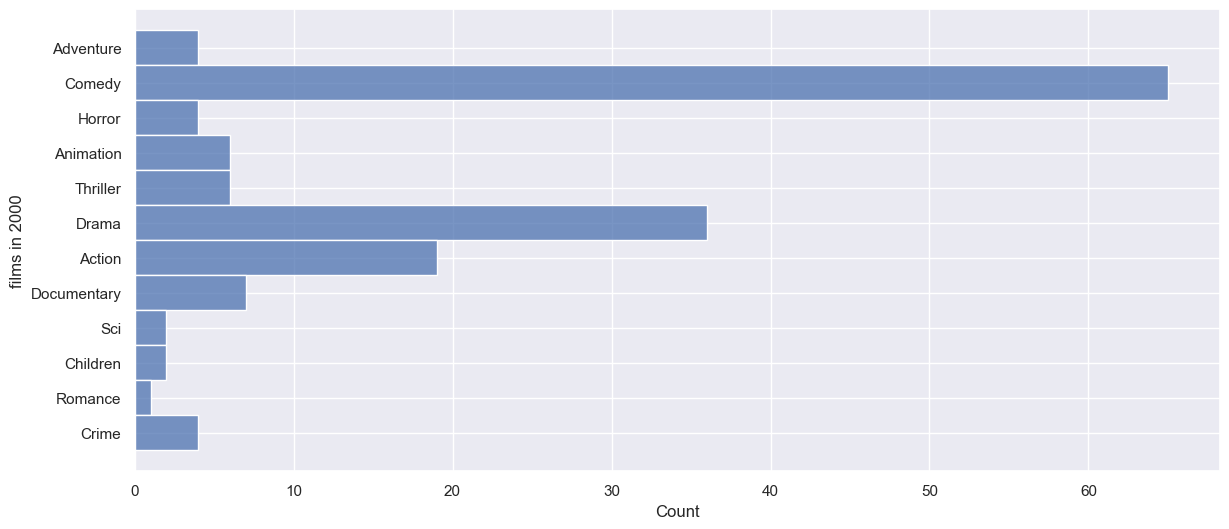

In [15]:
def genre_inayear(year):
    plt.figure(figsize=(14,6))
    sns.histplot(data = movies_data.loc[movies_data['Year'] == year], y = 'Genre')
    plt.ylabel('films in ' + str(year))

genre_inayear(1980)
genre_inayear(1995)
genre_inayear(2000)

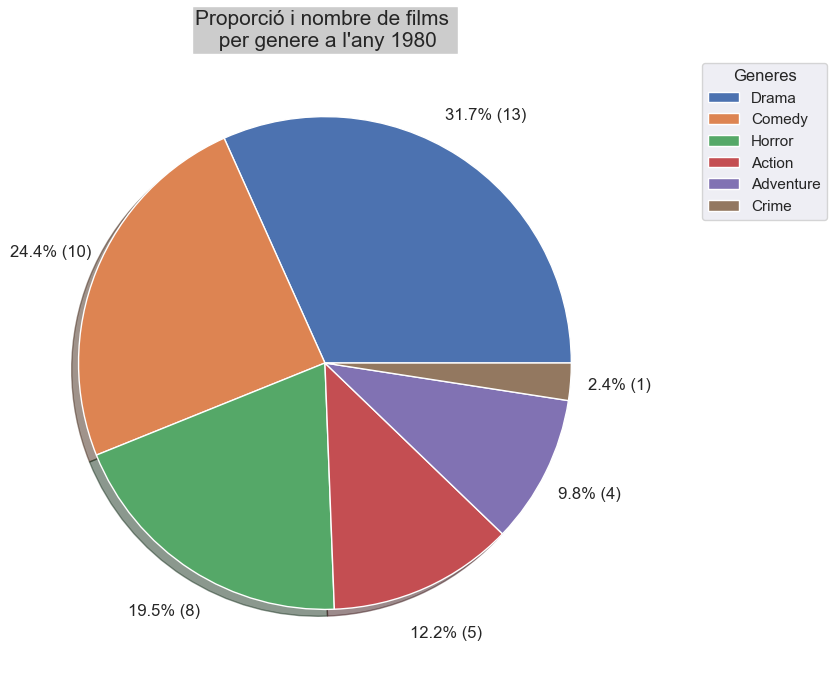

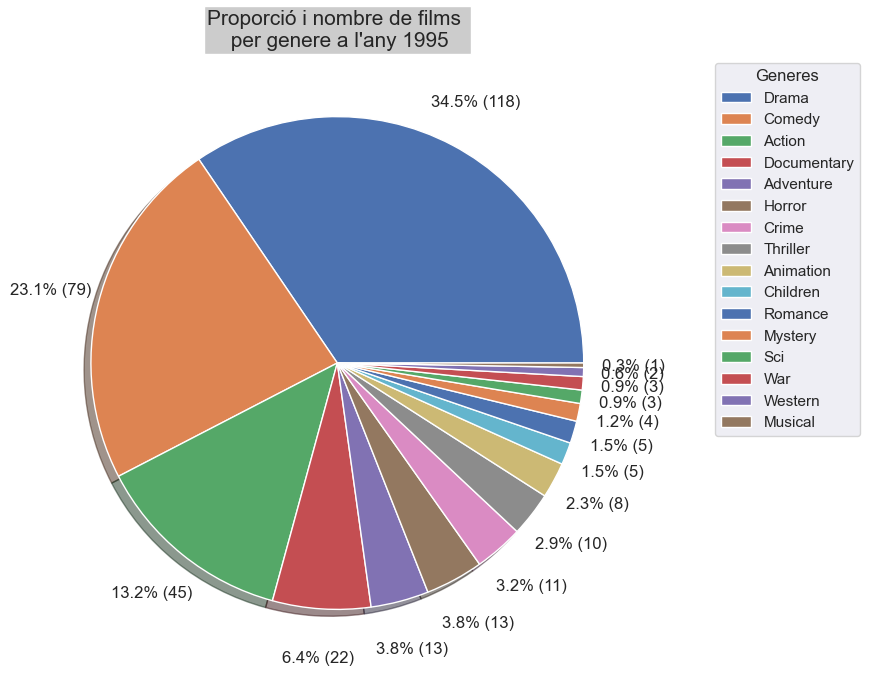

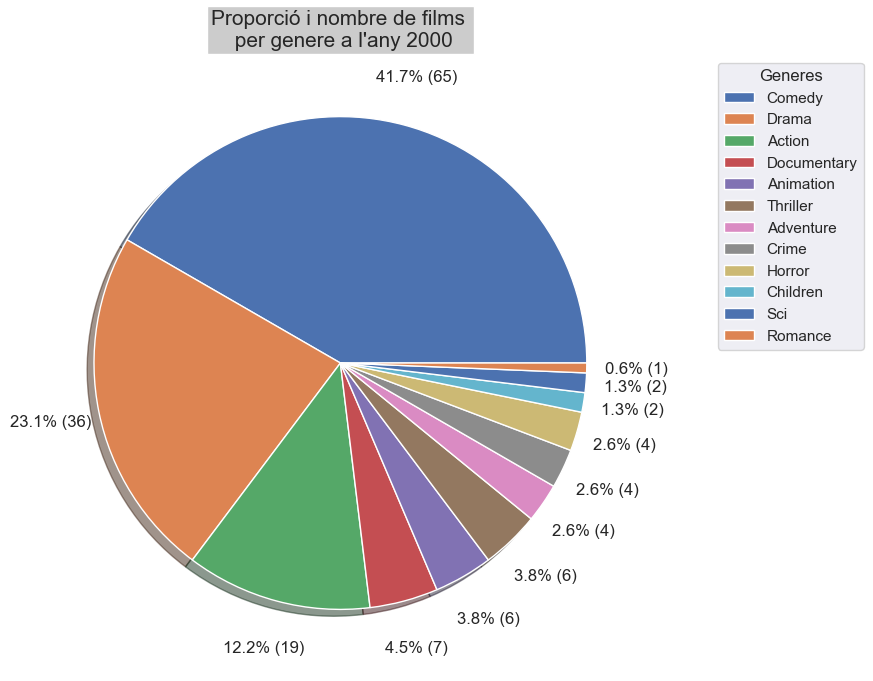

In [16]:
def genreproportion_inayear(year):
    plt.figure(figsize=(8,8))
    plt.pie((movies_data.loc[movies_data['Year'] == year].value_counts('Genre')), startangle = 0, 
    counterclock = True, shadow = True, 
    autopct = lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*(movies_data.loc[movies_data['Year'] == year].value_counts('Genre')).sum()), 
    pctdistance = 1.2, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
    plt.legend(title = "Generes", bbox_to_anchor=(1.1, 1), 
               loc='upper left', labels = movies_data.loc[movies_data['Year'] == year].value_counts('Genre').index)
    plt.title('Proporció i nombre de films \n per genere a l\'any ' + str(year), 
              fontsize=15, bbox={'facecolor':'0.8', 'pad':2.5})

genreproportion_inayear(1980)
genreproportion_inayear(1995)
genreproportion_inayear(2000)

Amb l'objectiu de completar l'exercici hem decidit incloure una funció que retorni una llista de pelicules (com a dataframe) quan li insereixes un any.

In [17]:
def movies_ofyear(year):
    return(movies_data.loc[movies_data['Year'] == year].sort_values('Film'))

movies_ofyear(1980)

,Film,Year,Genre
id,,,
2791,Airplane!,1980,Comedy
2525,Alligator,1980,Action
3649,American Gigolo,1980,Drama
2130,Atlantic City,1980,Crime
2163,Attack of the Killer Tomatoes!,1980,Comedy
2950,"Blue Lagoon, The",1980,Adventure
1220,"Blues Brothers, The",1980,Action
3811,Breaker Morant,1980,Drama
3834,Bronco Billy,1980,Adventure
